# **VGG-19**

**Read CSV of concatenated features**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/merged_concate_features.csv")
df

,Concatenated Features,PRIMARY ID Number,Race,Caucasian race,breast laterality,AGE at MRI1 (yrs),ER positive,PR Positive,HER2 Positive,ER_PR_HER2_TESTED,...,Clinical size pre,Clinical size post,Clinical response,Cancer type,Surgery type,path size (cm),LN,censor,DFS time (weeks),recur type
0,0.22642846 0.0 0.0 0.0 0.72708666 0.6423621 0....,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,...,7.0,5.0,3.0,IL,M,2.2,1.0,1,347,normal
1,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,...,7.0,5.0,3.0,IL,M,2.2,1.0,1,347,normal
2,1.0137632 0.0 0.0 0.41401523 0.7700952 3.39028...,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,...,7.0,5.0,3.0,IL,M,2.2,1.0,1,347,normal
3,0.0 0.0 0.0 0.0 0.0 0.13380851 0.0 0.0 0.0 0.0...,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,...,8.0,3.0,2.0,ID/mucinous,M,4.0,0.0,0,281,met
4,0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,...,8.0,3.0,2.0,ID/mucinous,M,4.0,0.0,0,281,met
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.007170411 0.0 0.8130917 0.0 0.08756027 0.0 0...,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,...,3.5,1.5,2.0,ID,L,2.8,1.0,0,234,met
131,0.0 0.0 0.0 0.0 0.0 2.5460932 0.0 0.0 0.0 0.0 ...,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,...,3.5,1.5,2.0,ID,L,2.8,1.0,0,234,met
132,0.06110021 0.0 0.0 0.0 0.84358275 2.5956106 0....,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,...,3.5,1.5,2.0,ID,L,2.8,1.0,0,234,met
133,0.004195116 0.0062669953 2.789328 0.0 0.011097...,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,...,3.5,1.5,2.0,ID,L,2.8,1.0,0,234,met


**Split the concatenated features**

In [ ]:

# Split the 'Concatenated Features' into multiple columns
new_cols = df['Concatenated Features'].str.split(' ', expand=True)

# Convert all new columns to numeric type
new_cols = new_cols.apply(pd.to_numeric, errors='coerce')

# Naming new columns based on their order
new_cols.columns = [f'Feature_{i}' for i in range(new_cols.shape[1])]

# Join the new columns back to the original dataframe
df = df.join(new_cols)

# Drop the original 'Concatenated Features' column as it's no longer needed
df.drop(columns=['Concatenated Features'], inplace=True)

# Save the modified DataFrame back to a CSV if needed
df.to_csv('modified_concate.csv', index=False)


In [ ]:
df1 = pd.read_csv("/content/modified_concate.csv")
df1

,PRIMARY ID Number,Race,Caucasian race,breast laterality,AGE at MRI1 (yrs),ER positive,PR Positive,HER2 Positive,ER_PR_HER2_TESTED,HR_HER2_CATEGORY,...,Feature_20470,Feature_20471,Feature_20472,Feature_20473,Feature_20474,Feature_20475,Feature_20476,Feature_20477,Feature_20478,Feature_20479
0,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,1.847620,0.0,0.029003,0.000000,0.032589,0.000000,0.0,0.0,0.294480,0.000000
1,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,1.185731,0.0,0.000000,0.000000,0.027354,0.000000,0.0,0.0,0.286661,0.000000
2,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,1.090127,0.0,0.674969,0.136579,0.025839,0.872459,0.0,0.0,0.471067,0.944602
3,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,1.0,...,1.211206,0.0,4.061787,0.061475,0.030650,0.000000,0.0,0.0,0.326208,0.000000
4,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,1.0,...,1.242933,0.0,4.227966,0.000000,0.165290,0.000000,0.0,0.0,0.279903,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,1.407431,0.0,6.078995,0.242696,0.028371,0.000000,0.0,0.0,0.864873,0.000000
131,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,1.334993,0.0,4.810176,0.000000,0.054959,0.000000,0.0,0.0,0.437571,0.000000
132,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,1.281885,0.0,6.293608,0.000000,0.027343,0.000000,0.0,0.0,0.545977,0.008270
133,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,1.341916,0.0,6.621323,0.000000,0.027555,0.000000,0.0,0.0,0.507608,0.026475


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Columns: 20512 entries, PRIMARY ID Number to Feature_20479
dtypes: bool(1), float64(20496), int64(4), object(11)
memory usage: 21.1+ MB


In [ ]:
df1.isna().sum()

PRIMARY ID Number    0
Race                 0
Caucasian race       0
breast laterality    0
AGE at MRI1 (yrs)    0
                    ..
Feature_20475        0
Feature_20476        0
Feature_20477        0
Feature_20478        0
Feature_20479        0
Length: 20512, dtype: int64

In [ ]:
df1['recur type'].value_counts()

recur type
normal    45
met       45
local     45
Name: count, dtype: int64

**Feature Selection to reduce size** using SelectFromModel

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


# Display the number of rows and columns in the newly loaded dataset
original_shape = df1.shape

X = df1.drop(columns=['recur type'])
y = df1['recur type']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the data
rf.fit(X, y)

# Using SelectFromModel to automatically select features based on importance weights
selector = SelectFromModel(rf, prefit=True)

# Get the boolean mask of the selected features
selected_features = X.columns[selector.get_support()]

# Create new DataFrames with only the selected features
X_selected = X[selected_features]

# Combine the selected features with the target variable
selected_data = pd.concat([X_selected, y], axis=1)

In [ ]:
# Save the selected features and target variable to a new CSV file
output_file_path = '/content/selected_features_vgg19.csv'
selected_data.to_csv(output_file_path, index=False)

# Print the number of rows and columns in the original and new dataset, and the number of selected features
print("Original dataset shape:", original_shape)
print("Reduced dataset shape:", selected_data.shape)
print("Number of selected features:", len(selected_features))
print("Selected features are saved to:", output_file_path)

Original dataset shape: (135, 20512)
Reduced dataset shape: (135, 1583)
Number of selected features: 1582
Selected features are saved to: /content/selected_features_vgg19.csv


In [ ]:
df2 = pd.read_csv('/content/selected_features_vgg19.csv')
df2

,AGE at MRI1 (yrs),ER positive,PR Positive,HR_HER2_CATEGORY,LD 1 (cm),LD 2 (cm),LD 3 (cm),SER Volume 1 (cc),SER Volume 2 (cc),SER Volume 3 (cc),...,Feature_20451,Feature_20461,Feature_20468,Feature_20471,Feature_20474,Feature_20479,Race_other,HR_HER2_STATUS_TripleNeg,Cancer type_ID,recur type
0,44.9,1.0,1.0,1.0,4.00,3.45,3.21,9.0,4.4,0.3,...,2.225884,0.063947,0.000000,0.0,0.032589,0.000000,False,False,False,normal
1,44.9,1.0,1.0,1.0,4.00,3.45,3.21,9.0,4.4,0.3,...,0.688177,0.034634,0.000000,0.0,0.027354,0.000000,False,False,False,normal
2,44.9,1.0,1.0,1.0,4.00,3.45,3.21,9.0,4.4,0.3,...,0.948077,0.606205,0.000000,0.0,0.025839,0.944602,False,False,False,normal
3,37.3,1.0,1.0,1.0,7.95,3.44,7.02,44.3,2.4,22.2,...,0.464545,1.856075,0.063022,0.0,0.030650,0.000000,False,False,False,met
4,37.3,1.0,1.0,1.0,7.95,3.44,7.02,44.3,2.4,22.2,...,1.386916,1.252109,0.576836,0.0,0.165290,0.000000,False,False,False,met
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,37.5,1.0,1.0,2.0,3.21,2.93,2.91,7.2,6.3,3.8,...,0.377606,1.849540,0.613586,0.0,0.028371,0.000000,False,False,True,met
131,37.5,1.0,1.0,2.0,3.21,2.93,2.91,7.2,6.3,3.8,...,0.489821,0.709055,1.419231,0.0,0.054959,0.000000,False,False,True,met
132,37.5,1.0,1.0,2.0,3.21,2.93,2.91,7.2,6.3,3.8,...,0.796603,0.585706,0.673791,0.0,0.027343,0.008270,False,False,True,met
133,37.5,1.0,1.0,2.0,3.21,2.93,2.91,7.2,6.3,3.8,...,0.860881,1.012818,0.864780,0.0,0.027555,0.026475,False,False,True,met


In [ ]:
# Assuming df2 is your DataFrame
columns_list = df2.columns.tolist()
print(columns_list)


['AGE at MRI1 (yrs)', 'ER positive', 'PR Positive', 'HR_HER2_CATEGORY', 'LD 1 (cm) ', 'LD 2 (cm)', 'LD 3 (cm)', 'SER Volume 1 (cc)', 'SER Volume 2 (cc)', 'SER Volume 3 (cc)', 'Clinical size pre', 'path size (cm)', 'censor', 'DFS time (weeks)', 'Feature_5', 'Feature_6', 'Feature_17', 'Feature_25', 'Feature_30', 'Feature_32', 'Feature_42', 'Feature_46', 'Feature_83', 'Feature_100', 'Feature_112', 'Feature_113', 'Feature_119', 'Feature_148', 'Feature_162', 'Feature_166', 'Feature_172', 'Feature_181', 'Feature_199', 'Feature_207', 'Feature_221', 'Feature_222', 'Feature_232', 'Feature_276', 'Feature_279', 'Feature_294', 'Feature_319', 'Feature_321', 'Feature_357', 'Feature_389', 'Feature_416', 'Feature_417', 'Feature_435', 'Feature_460', 'Feature_463', 'Feature_498', 'Feature_512', 'Feature_533', 'Feature_556', 'Feature_576', 'Feature_598', 'Feature_601', 'Feature_612', 'Feature_618', 'Feature_622', 'Feature_636', 'Feature_639', 'Feature_672', 'Feature_675', 'Feature_678', 'Feature_694', 'F

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# Load the dataset
file_path = '/content/selected_features_vgg19.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Shuffle the dataset
shuffled_data = shuffle(data, random_state=42)

# Save the shuffled dataset to a new CSV file
shuffled_file_path = '/content/selected_features_shuffled_vgg.csv'  # Replace with your desired path
shuffled_data.to_csv(shuffled_file_path, index=False)

print("The dataset has been shuffled and saved to:", shuffled_file_path)


The dataset has been shuffled and saved to: /content/selected_features_shuffled_vgg.csv


In [ ]:
df3 = pd.read_csv('/content/selected_features_shuffled_vgg.csv')
df3

,AGE at MRI1 (yrs),ER positive,PR Positive,HR_HER2_CATEGORY,LD 1 (cm),LD 2 (cm),LD 3 (cm),SER Volume 1 (cc),SER Volume 2 (cc),SER Volume 3 (cc),...,Feature_20451,Feature_20461,Feature_20468,Feature_20471,Feature_20474,Feature_20479,Race_other,HR_HER2_STATUS_TripleNeg,Cancer type_ID,recur type
0,50.7,0.0,0.0,2.0,11.40,11.40,9.80,94.1,101.3,0.9,...,0.673268,3.589251,0.665185,0.000000,0.087222,0.000000,False,False,True,local
1,45.0,1.0,1.0,1.0,4.01,3.44,2.95,15.6,2.4,6.7,...,1.299684,2.769030,1.348993,0.000000,0.000000,0.000000,False,False,True,normal
2,50.7,0.0,0.0,2.0,11.40,11.40,9.80,94.1,101.3,0.9,...,0.649824,1.583008,0.041570,0.000000,0.026302,0.032070,False,False,True,local
3,71.5,1.0,1.0,1.0,7.70,7.10,6.46,40.7,35.1,11.1,...,2.335988,0.506953,0.000000,0.089331,0.032741,0.000000,True,False,True,normal
4,45.9,1.0,1.0,1.0,3.12,3.44,2.62,27.7,2.4,3.8,...,1.729890,0.034634,0.000000,0.000000,0.027341,0.000000,False,False,True,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,40.7,0.0,0.0,3.0,4.37,3.44,0.90,11.5,2.4,0.1,...,0.902272,0.036622,0.053626,0.000000,0.027353,0.000000,False,True,True,local
131,63.0,1.0,1.0,1.0,2.50,2.10,2.90,4.0,4.4,2.6,...,1.720220,2.219684,0.378605,0.000000,0.114638,0.000000,False,False,True,normal
132,41.2,0.0,0.0,3.0,6.23,7.60,8.55,62.3,71.9,86.3,...,0.917122,0.034634,0.312445,0.000000,0.039421,0.365219,True,True,True,local
133,31.0,1.0,0.0,2.0,3.50,2.66,1.00,16.5,4.5,0.2,...,0.309615,0.034634,0.000000,0.000000,0.027354,0.000000,False,False,True,met


**Preprocessing**

In [ ]:
# Split the dataset into features (X) and target variable (y)
# List of columns to drop
columns_to_drop = [
    # 'AGE at MRI1 (yrs)',
    # 'ER positive',
    # 'PR Positive',
    # 'HR_HER2_CATEGORY',
   # 'LD 1 (cm)',
    # 'LD 2 (cm)',
    # 'LD 3 (cm)',
    # 'SER Volume 1 (cc)',
    # 'SER Volume 2 (cc)',
    # 'SER Volume 3 (cc)',
    # 'Clinical size pre',
    # 'path size (cm)',
    # 'censor',
    # 'DFS time (weeks)',
    "recur type",
    # "Race_other",
    # "HR_HER2_STATUS_TripleNeg",
    # "Cancer type_ID",
]

# Drop the specified columns from df2
X = df3.drop(columns=columns_to_drop)
y = df3["recur type"]

In [ ]:
X

,AGE at MRI1 (yrs),ER positive,PR Positive,HR_HER2_CATEGORY,LD 1 (cm),LD 2 (cm),LD 3 (cm),SER Volume 1 (cc),SER Volume 2 (cc),SER Volume 3 (cc),...,Feature_20443,Feature_20451,Feature_20461,Feature_20468,Feature_20471,Feature_20474,Feature_20479,Race_other,HR_HER2_STATUS_TripleNeg,Cancer type_ID
0,50.7,0.0,0.0,2.0,11.40,11.40,9.80,94.1,101.3,0.9,...,0.000000,0.673268,3.589251,0.665185,0.000000,0.087222,0.000000,False,False,True
1,45.0,1.0,1.0,1.0,4.01,3.44,2.95,15.6,2.4,6.7,...,0.495063,1.299684,2.769030,1.348993,0.000000,0.000000,0.000000,False,False,True
2,50.7,0.0,0.0,2.0,11.40,11.40,9.80,94.1,101.3,0.9,...,0.000000,0.649824,1.583008,0.041570,0.000000,0.026302,0.032070,False,False,True
3,71.5,1.0,1.0,1.0,7.70,7.10,6.46,40.7,35.1,11.1,...,0.000000,2.335988,0.506953,0.000000,0.089331,0.032741,0.000000,True,False,True
4,45.9,1.0,1.0,1.0,3.12,3.44,2.62,27.7,2.4,3.8,...,0.000000,1.729890,0.034634,0.000000,0.000000,0.027341,0.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,40.7,0.0,0.0,3.0,4.37,3.44,0.90,11.5,2.4,0.1,...,0.000000,0.902272,0.036622,0.053626,0.000000,0.027353,0.000000,False,True,True
131,63.0,1.0,1.0,1.0,2.50,2.10,2.90,4.0,4.4,2.6,...,0.000000,1.720220,2.219684,0.378605,0.000000,0.114638,0.000000,False,False,True
132,41.2,0.0,0.0,3.0,6.23,7.60,8.55,62.3,71.9,86.3,...,0.000000,0.917122,0.034634,0.312445,0.000000,0.039421,0.365219,True,True,True
133,31.0,1.0,0.0,2.0,3.50,2.66,1.00,16.5,4.5,0.2,...,0.000000,0.309615,0.034634,0.000000,0.000000,0.027354,0.000000,False,False,True


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on the target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, check if all classes are present in the test set
unique_classes_train = set(y_train)
unique_classes_test = set(y_test)

print("Classes in training set:", unique_classes_train)
print("Classes in testing set:", unique_classes_test)

Classes in training set: {0, 1, 2}
Classes in testing set: {0, 1, 2}


**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=40, random_state=42)

# Perform 5-fold cross-validation and calculate the accuracy scores
cv_scores = cross_val_score(mlp, X_train, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV accuracy:", cv_scores.std())

# Train the MLP model
mlp.fit(X_train, y_train)

# Make predictions on the training set
train_pred = mlp.predict(X_train)

# Calculate train accuracy
train_accuracy = accuracy_score(y_train, train_pred)
print("Training Set Accuracy:", train_accuracy)

# Make predictions on the test set
test_pred = mlp.predict(X_test)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, test_pred)
print("Testing Set Accuracy:", test_accuracy)

# Print the classification report for the test set
print(classification_report(y_test, test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Cross-validation scores: [1.         1.         0.90909091 0.81818182 1.         0.90909091
 0.90909091 1.         0.9        1.        ]
Mean CV accuracy: 0.9445454545454546
Standard deviation of CV accuracy: 0.0609090909090909
Training Set Accuracy: 0.9722222222222222
Testing Set Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         9
           2       0.90      1.00      0.95         9

    accuracy                           0.96        27
   macro avg       0.97      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(


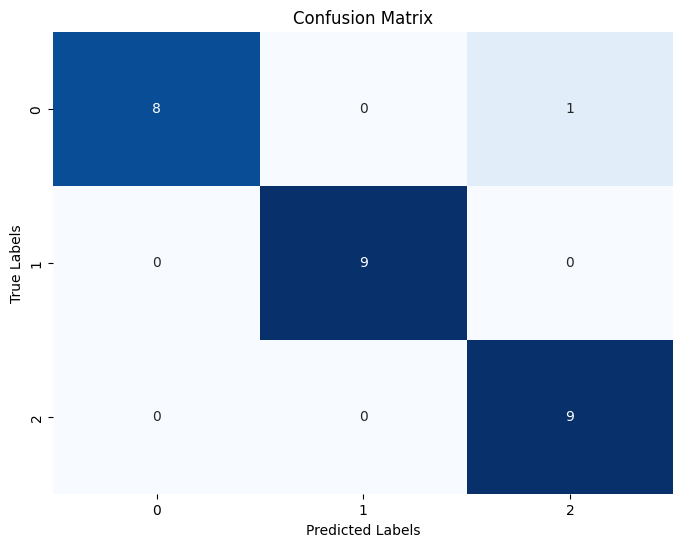

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for test set predictions
cm = confusion_matrix(y_test, test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

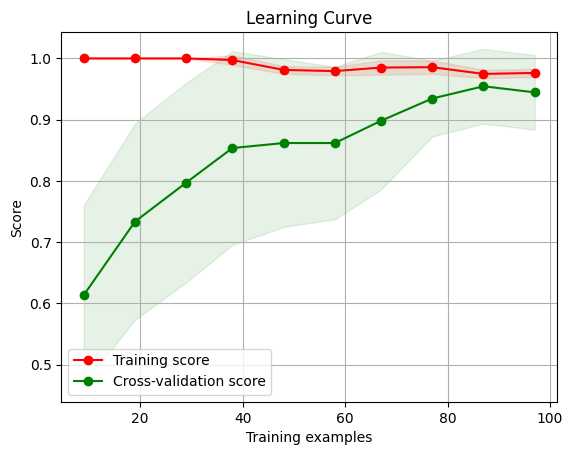

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(mlp, X_train, y_train, cv=10, scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

# **Alexnet**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/merged_concate_features_alexnet.csv")
df

,Concatenated Features,PRIMARY ID Number,Race,Caucasian race,breast laterality,AGE at MRI1 (yrs),ER positive,PR Positive,HER2 Positive,ER_PR_HER2_TESTED,...,Clinical size pre,Clinical size post,Clinical response,Cancer type,Surgery type,path size (cm),LN,censor,DFS time (weeks),recur type
0,0.12816197 1.5097216 -0.35615072 0.15225418 2....,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,...,7.0,5.0,3.0,IL,M,2.2,1.0,1,347,normal
1,0.12816197 1.5097216 -0.35615072 0.15225418 2....,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,...,7.0,5.0,3.0,IL,M,2.2,1.0,1,347,normal
2,0.12816197 1.5097216 -0.35615072 0.15225418 2....,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,...,7.0,5.0,3.0,IL,M,2.2,1.0,1,347,normal
3,0.12928557 1.5095947 -0.3547838 0.15242417 2.0...,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,...,8.0,3.0,2.0,ID/mucinous,M,4.0,0.0,0,281,met
4,0.12816197 1.5097216 -0.35615072 0.15225418 2....,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,...,8.0,3.0,2.0,ID/mucinous,M,4.0,0.0,0,281,met
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.12816197 1.5097216 -0.35615072 0.15225418 2....,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,...,3.5,1.5,2.0,ID,L,2.8,1.0,0,234,met
131,0.12816197 1.5097216 -0.35615072 0.15225418 2....,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,...,3.5,1.5,2.0,ID,L,2.8,1.0,0,234,met
132,0.12816197 1.5097216 -0.35615072 0.15225418 2....,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,...,3.5,1.5,2.0,ID,L,2.8,1.0,0,234,met
133,0.12816197 1.5097216 -0.35615072 0.15225418 2....,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,...,3.5,1.5,2.0,ID,L,2.8,1.0,0,234,met


In [ ]:
df.isna().sum()

Concatenated Features    0
PRIMARY ID Number        0
Race                     0
Caucasian race           0
breast laterality        0
AGE at MRI1 (yrs)        0
ER positive              0
PR Positive              0
HER2 Positive            0
ER_PR_HER2_TESTED        0
HR_HER2_CATEGORY         0
HR_HER2_STATUS           0
MRI 1                    0
MRI 2                    0
MRI 3                    0
LD 1 (cm)                0
LD 2 (cm)                0
LD 3 (cm)                0
SER Volume 1 (cc)        0
SER Volume 2 (cc)        0
SER Volume 3 (cc)        0
chemo                    0
AC only=0, taxol=1       0
Clinical size pre        0
Clinical size post       0
Clinical response        0
Cancer type              0
Surgery type             0
path size (cm)           0
LN                       0
censor                   0
DFS time (weeks)         0
recur type               0
dtype: int64

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/merged_concate_features_alexnet.csv')

# Split the 'Concatenated Features' into multiple columns
# Assuming the features are separated by spaces
new_cols = df['Concatenated Features'].str.split(' ', expand=True)

# Convert all new columns to numeric type
new_cols = new_cols.apply(pd.to_numeric, errors='coerce')

# Naming new columns based on their order
new_cols.columns = [f'Feature_{i}' for i in range(new_cols.shape[1])]

# Join the new columns back to the original dataframe
df = df.join(new_cols)

# Drop the original 'Concatenated Features' column as it's no longer needed
df.drop(columns=['Concatenated Features'], inplace=True)

# Save the modified DataFrame back to a CSV if needed
df.to_csv('modified_concate_alexnet.csv', index=False)


In [ ]:
df1 = pd.read_csv("/content/modified_concate_alexnet.csv")
df1

,PRIMARY ID Number,Race,Caucasian race,breast laterality,AGE at MRI1 (yrs),ER positive,PR Positive,HER2 Positive,ER_PR_HER2_TESTED,HR_HER2_CATEGORY,...,Feature_163830,Feature_163831,Feature_163832,Feature_163833,Feature_163834,Feature_163835,Feature_163836,Feature_163837,Feature_163838,Feature_163839
0,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Columns: 163872 entries, PRIMARY ID Number to Feature_163839
dtypes: bool(1), float64(163856), int64(4), object(11)
memory usage: 168.8+ MB


In [ ]:
df1.isna().sum()

PRIMARY ID Number      0
Race                   0
Caucasian race         0
breast laterality      0
AGE at MRI1 (yrs)      0
                    ... 
Feature_163835       135
Feature_163836       135
Feature_163837       135
Feature_163838       135
Feature_163839       135
Length: 163872, dtype: int64

In [ ]:
# Drop columns that contain any NA values
df1 = df1.dropna(axis=1, how='any')
df1

,PRIMARY ID Number,Race,Caucasian race,breast laterality,AGE at MRI1 (yrs),ER positive,PR Positive,HER2 Positive,ER_PR_HER2_TESTED,HR_HER2_CATEGORY,...,Feature_160734,Feature_160735,Feature_160736,Feature_160737,Feature_160738,Feature_160739,Feature_160740,Feature_160741,Feature_160742,Feature_160743
0,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,-0.051013,-0.211926,-0.219538,-1.331022,0.495757,-0.472807,-2.747703,-0.758338,0.986593,1.519407
1,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,-0.051013,-0.211926,-0.219538,-1.331022,0.495757,-0.472807,-2.747703,-0.758338,0.986593,1.519407
2,1,caucasian,caucasian,left,44.9,1.0,1.0,0.0,True,1.0,...,-0.051013,-0.211926,-0.219538,-1.331022,0.495757,-0.472807,-2.747703,-0.758338,0.986593,1.519407
3,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,1.0,...,-0.050828,-0.211609,-0.219657,-1.330647,0.495719,-0.472643,-2.747266,-0.758123,0.986584,1.519413
4,2,african-amer,other,right,37.3,1.0,1.0,0.0,True,1.0,...,-0.051013,-0.211926,-0.219538,-1.331022,0.495757,-0.472807,-2.747703,-0.758338,0.986593,1.519407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,-0.051013,-0.211926,-0.219538,-1.331022,0.495757,-0.472807,-2.747703,-0.758338,0.986593,1.519407
131,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,-0.051013,-0.211926,-0.219538,-1.331022,0.495757,-0.472807,-2.747703,-0.758338,0.986593,1.519407
132,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,-0.051013,-0.211926,-0.219538,-1.331022,0.495757,-0.472807,-2.747703,-0.758338,0.986593,1.519407
133,68,caucasian,caucasian,left,37.5,1.0,1.0,1.0,True,2.0,...,-0.051013,-0.211926,-0.219538,-1.331022,0.495757,-0.472807,-2.747703,-0.758338,0.986593,1.519407


In [ ]:
df1.shape

(135, 40032)

In [ ]:
df1.isna().sum()

PRIMARY ID Number    0
Race                 0
Caucasian race       0
breast laterality    0
AGE at MRI1 (yrs)    0
                    ..
Feature_160739       0
Feature_160740       0
Feature_160741       0
Feature_160742       0
Feature_160743       0
Length: 40032, dtype: int64

In [ ]:
df1['recur type'].value_counts()

recur type
normal    45
met       45
local     45
Name: count, dtype: int64

In [ ]:
df1.to_csv('alexnet_features_separated.csv', index=False)

**Feature Selection to reduce size**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Load the dataset
new_data_path = '/content/alexnet_features_separated.csv'
data = pd.read_csv(new_data_path)

# Display the number of rows and columns in the newly loaded dataset
original_shape = data.shape

# Assuming 'recur type' is your target variable
X = data.drop(columns=['recur type'])
y = data['recur type']

# Convert categorical variables to dummy variables if any
X = pd.get_dummies(X)

# Create a RandomForestClassifier model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the data
rf.fit(X, y)

# Using SelectFromModel to automatically select features based on importance weights
# Adjust the threshold to a lower value to include more features, e.g., a fraction of the mean importance
mean_importance = rf.feature_importances_.mean()
selector = SelectFromModel(rf, threshold=mean_importance * 0.1, prefit=True)  # Reduced to 50% of the mean importance

# Get the boolean mask of the selected features
selected_features = X.columns[selector.get_support()]

# Create new DataFrames with only the selected features
X_selected = X[selected_features]

# Combine the selected features with the target variable
selected_data = pd.concat([X_selected, y], axis=1)

# Save the selected features and target variable to a new CSV file
output_file_path = '/content/selected_features_alexnet.csv'
selected_data.to_csv(output_file_path, index=False)

# Print the number of rows and columns in the original and new dataset, and the number of selected features
print("Original dataset shape:", original_shape)
print("Reduced dataset shape:", selected_data.shape)
print("Number of selected features:", len(selected_features))
print("Selected features are saved to:", output_file_path)

Original dataset shape: (135, 40032)
Reduced dataset shape: (135, 1661)
Number of selected features: 1660
Selected features are saved to: /content/selected_features_alexnet.csv


In [ ]:
df2 = pd.read_csv('/content/selected_features_alexnet.csv')
df2


,PRIMARY ID Number,AGE at MRI1 (yrs),ER positive,PR Positive,HER2 Positive,ER_PR_HER2_TESTED,HR_HER2_CATEGORY,LD 1 (cm),LD 2 (cm),LD 3 (cm),...,HR_HER2_STATUS_TripleNeg,chemo_AC,chemo_AC/T,Cancer type_ID,Cancer type_IL,Cancer type_adenocarc NOS,Surgery type_L,Surgery type_L (Q)- no rd tx,Surgery type_M,recur type
0,1,44.9,1.0,1.0,0.0,True,1.0,4.00,3.45,3.21,...,False,True,False,False,True,False,False,False,True,normal
1,1,44.9,1.0,1.0,0.0,True,1.0,4.00,3.45,3.21,...,False,True,False,False,True,False,False,False,True,normal
2,1,44.9,1.0,1.0,0.0,True,1.0,4.00,3.45,3.21,...,False,True,False,False,True,False,False,False,True,normal
3,2,37.3,1.0,1.0,0.0,True,1.0,7.95,3.44,7.02,...,False,True,False,False,False,False,False,False,True,met
4,2,37.3,1.0,1.0,0.0,True,1.0,7.95,3.44,7.02,...,False,True,False,False,False,False,False,False,True,met
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,68,37.5,1.0,1.0,1.0,True,2.0,3.21,2.93,2.91,...,False,True,False,True,False,False,True,False,False,met
131,68,37.5,1.0,1.0,1.0,True,2.0,3.21,2.93,2.91,...,False,True,False,True,False,False,True,False,False,met
132,68,37.5,1.0,1.0,1.0,True,2.0,3.21,2.93,2.91,...,False,True,False,True,False,False,True,False,False,met
133,68,37.5,1.0,1.0,1.0,True,2.0,3.21,2.93,2.91,...,False,True,False,True,False,False,True,False,False,met


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Columns: 1661 entries, PRIMARY ID Number to recur type
dtypes: bool(20), float64(1636), int64(4), object(1)
memory usage: 1.7+ MB


In [ ]:
df2['recur type'].value_counts()

recur type
normal    45
met       45
local     45
Name: count, dtype: int64

In [ ]:
import pandas as pd
from sklearn.utils import shuffle

# Load the dataset
file_path = '/content/selected_features_alexnet.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Shuffle the dataset
shuffled_data = shuffle(data, random_state=42)

# Save the shuffled dataset to a new CSV file
shuffled_file_path = '/content/selected_features_shuffled_alexnet.csv'  # Replace with your desired path
shuffled_data.to_csv(shuffled_file_path, index=False)

print("The dataset has been shuffled and saved to:", shuffled_file_path)


The dataset has been shuffled and saved to: /content/selected_features_shuffled_alexnet.csv


In [ ]:
df2 = pd.read_csv('/content/selected_features_shuffled_alexnet.csv')
df2

,PRIMARY ID Number,AGE at MRI1 (yrs),ER positive,PR Positive,HER2 Positive,ER_PR_HER2_TESTED,HR_HER2_CATEGORY,LD 1 (cm),LD 2 (cm),LD 3 (cm),...,HR_HER2_STATUS_TripleNeg,chemo_AC,chemo_AC/T,Cancer type_ID,Cancer type_IL,Cancer type_adenocarc NOS,Surgery type_L,Surgery type_L (Q)- no rd tx,Surgery type_M,recur type
0,51,50.7,0.0,0.0,1.0,True,2.0,11.40,11.40,9.80,...,False,True,False,True,False,False,False,False,True,local
1,41,45.0,1.0,1.0,0.0,True,1.0,4.01,3.44,2.95,...,False,True,False,True,False,False,True,False,False,normal
2,51,50.7,0.0,0.0,1.0,True,2.0,11.40,11.40,9.80,...,False,True,False,True,False,False,False,False,True,local
3,6,71.5,1.0,1.0,0.0,True,1.0,7.70,7.10,6.46,...,False,True,False,True,False,False,False,False,True,normal
4,27,45.9,1.0,1.0,0.0,True,1.0,3.12,3.44,2.62,...,False,True,False,True,False,False,False,True,False,local
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,43,40.7,0.0,0.0,0.0,True,3.0,4.37,3.44,0.90,...,True,True,False,True,False,False,True,False,False,local
131,54,63.0,1.0,1.0,0.0,True,1.0,2.50,2.10,2.90,...,False,True,False,True,False,False,False,False,True,normal
132,4,41.2,0.0,0.0,0.0,True,3.0,6.23,7.60,8.55,...,True,True,False,True,False,False,False,False,True,local
133,49,31.0,1.0,0.0,1.0,True,2.0,3.50,2.66,1.00,...,False,True,False,True,False,False,True,False,False,met


**Preprocessing**

In [ ]:
df2.isna().sum()

PRIMARY ID Number               0
AGE at MRI1 (yrs)               0
ER positive                     0
PR Positive                     0
HER2 Positive                   0
                               ..
Cancer type_adenocarc NOS       0
Surgery type_L                  0
Surgery type_L (Q)- no rd tx    0
Surgery type_M                  0
recur type                      0
Length: 1661, dtype: int64

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df2.drop(columns=["recur type"])
y = df2["recur type"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on the target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Now, check if all classes are present in the test set
unique_classes_train = set(y_train)
unique_classes_test = set(y_test)

print("Classes in training set:", unique_classes_train)
print("Classes in testing set:", unique_classes_test)

Classes in training set: {0, 1, 2}
Classes in testing set: {0, 1, 2}


In [ ]:
X_train

,PRIMARY ID Number,AGE at MRI1 (yrs),ER positive,PR Positive,HER2 Positive,ER_PR_HER2_TESTED,HR_HER2_CATEGORY,LD 1 (cm),LD 2 (cm),LD 3 (cm),...,HR_HER2_STATUS_HRposHER2neg,HR_HER2_STATUS_TripleNeg,chemo_AC,chemo_AC/T,Cancer type_ID,Cancer type_IL,Cancer type_adenocarc NOS,Surgery type_L,Surgery type_L (Q)- no rd tx,Surgery type_M
117,1,44.9,1.0,1.0,0.0,True,1.0,4.00,3.45,3.21,...,True,False,True,False,False,True,False,False,False,True
28,67,48.3,0.0,0.0,0.0,True,3.0,6.17,3.44,0.70,...,False,True,True,False,True,False,False,False,False,True
5,39,52.4,0.0,0.0,0.0,True,3.0,7.50,3.44,5.10,...,False,True,True,False,True,False,False,False,False,True
104,43,40.7,0.0,0.0,0.0,True,3.0,4.37,3.44,0.90,...,False,True,True,False,True,False,False,True,False,False
8,67,48.3,0.0,0.0,0.0,True,3.0,6.17,3.44,0.70,...,False,True,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,4,41.2,0.0,0.0,0.0,True,3.0,6.23,7.60,8.55,...,False,True,True,False,True,False,False,False,False,True
3,6,71.5,1.0,1.0,0.0,True,1.0,7.70,7.10,6.46,...,True,False,True,False,True,False,False,False,False,True
106,67,48.3,0.0,0.0,0.0,True,3.0,6.17,3.44,0.70,...,False,True,True,False,True,False,False,False,False,True
123,67,48.3,0.0,0.0,0.0,True,3.0,6.17,3.44,0.70,...,False,True,True,False,True,False,False,False,False,True


**MLP_Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Assuming X_train, X_test, y_train, and y_test are already defined

# Define the parameter grid to tune the MLPClassifier
param_grid = {
    'hidden_layer_sizes': [(128, 64), (64, 32), (100,)],
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term)
    'learning_rate_init': [0.001, 0.01],  # Initial learning rate
    'max_iter': [100, 200, 300]  # Increased number of iterations to ensure convergence
}

# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=42)

# Set up GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Best estimator found by GridSearch
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model found by GridSearch
best_mlp = grid_search.best_estimator_
train_predictions = best_mlp.predict(X_train)
test_predictions = best_mlp.predict(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters found: {'alpha': 0.0001, 'hidden_layer_sizes': (128, 64), 'learning_rate_init': 0.001, 'max_iter': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score

# Adjust MLPClassifier with L2 regularization (alpha) and using cross-validation
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=100, alpha=0.001, random_state=42)

# Train and evaluate on the training set
mlp.fit(X_train, y_train)
train_pred_mlp = mlp.predict(X_train)
train_accuracy_mlp = accuracy_score(y_train, train_pred_mlp)

# Evaluate on the testing set
test_pred_mlp = mlp.predict(X_test)
test_accuracy_mlp = accuracy_score(y_test, test_pred_mlp)

print("Training Set Accuracy:", train_accuracy_mlp)
print("Testing Set Accuracy:", test_accuracy_mlp)
print("Classification Report on Test Set:\n", classification_report(y_test, test_pred_mlp))


Training Set Accuracy: 1.0
Testing Set Accuracy: 1.0
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluate the model using cross-validation on the scaled dataset
cv_scores = cross_val_score(mlp, X_train, y_train, cv=10)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean CV accuracy: 1.0
Standard deviation of CV scores: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


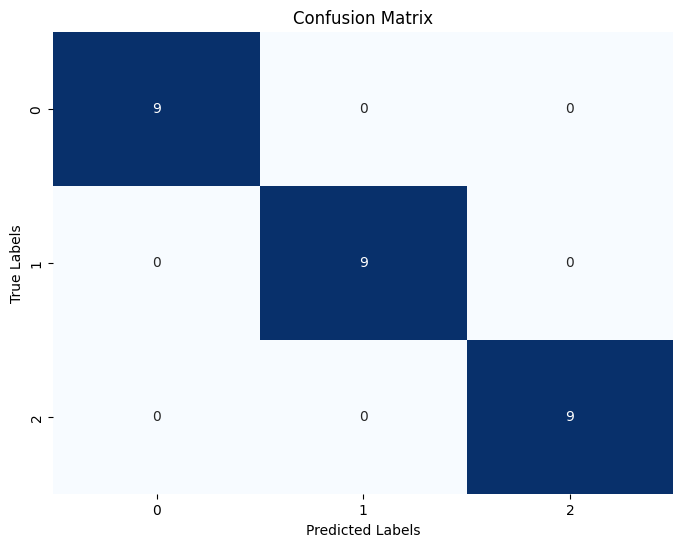

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for test set predictions
cm = confusion_matrix(y_test, test_pred_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
!jupyter nbconvert --to html '/content/Images_classifiation (1).ipynb'


[NbConvertApp] Converting notebook /content/Images_classifiation (1).ipynb to html
[NbConvertApp] Writing 675131 bytes to /content/Images_classifiation (1).html


**Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the model
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid to search
param_grid = {
    'n_estimators': [50, 80, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [8, 12, 16],  # Minimum number of samples required to split a node
    'min_samples_leaf': [4, 6, 8]  # Minimum number of samples required at each leaf node
}

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator found by GridSearch
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model found by GridSearch
best_rf = grid_search.best_estimator_
train_predictions = best_rf.predict(X_train)
test_predictions = best_rf.predict(X_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 100}


In [ ]:
# Configure RandomForest with more regularization
rf = RandomForestClassifier(
    n_estimators=100,

    min_samples_split=8,  # More samples needed to split a node
    min_samples_leaf=4,  # More samples needed at a leaf node

    random_state=42
)

rf.fit(X_train, y_train)

# Evaluate model
from sklearn.metrics import accuracy_score, classification_report

train_predictions = rf.predict(X_train)
test_predictions = rf.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, train_predictions))
print("Testing Accuracy:", accuracy_score(y_test, test_predictions))
print("Classification Report (Testing):\n", classification_report(y_test, test_predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.9259259259259259
Classification Report (Testing):
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.78      0.88         9
           2       1.00      1.00      1.00         9

    accuracy                           0.93        27
   macro avg       0.94      0.93      0.93        27
weighted avg       0.94      0.93      0.93        27



In [ ]:
from sklearn.model_selection import cross_val_score
# Evaluate the model using cross-validation on the scaled dataset
cv_scores = cross_val_score(rf, X_train, y_train, cv=10)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [1.         0.90909091 0.90909091 0.81818182 0.90909091 0.90909091
 0.90909091 1.         0.8        0.9       ]
Mean CV accuracy: 0.9063636363636365
Standard deviation of CV scores: 0.06058257120562229


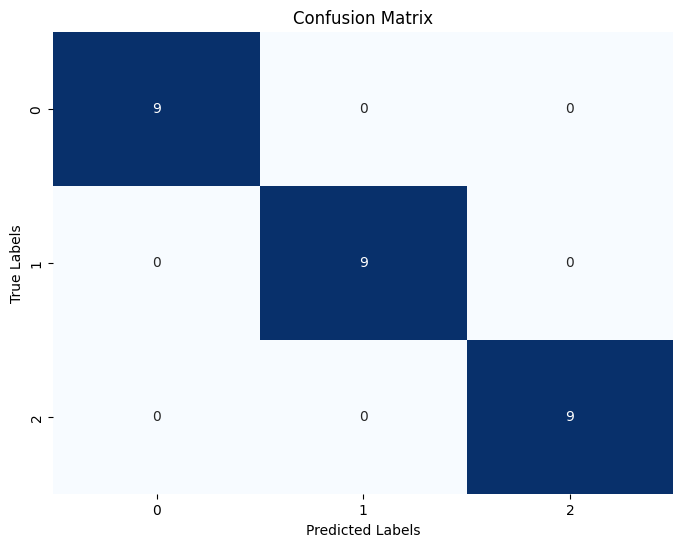

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for test set predictions
cm = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/Images_classifiation_trail2.ipynb

[NbConvertApp] Converting notebook /content/Images_classifiation_trail2.ipynb to html
[NbConvertApp] Writing 892811 bytes to /content/Images_classifiation_trail2.html
